In [1]:
import sys, os, cv2
module_rootdir = '../../..'
dataset_rootdir = '../../../../'
label_rootdir = module_rootdir
sys.path.append(module_rootdir)

import config_dataset
from modules.dataset_utils.bdd_dataset_utils.remapped_bdd_utils import load_ground_truths
from modules.augmentation.lib.dropout_transform import pixel_dropout, block_dropout, grid_dropout
from modules.plot.viz_annotation import draw_bbox_on_img_data

In [2]:
sel_train_labels_file = config_dataset.bdd_sel_train_labels_file
train_images_dir = config_dataset.bdd_train_images_dir

selected_labels = load_ground_truths(
    label_rootdir,
    sel_train_labels_file, 
    dataset_rootdir,
    train_images_dir, 
    verbose=True)

Load JSON file .. please wait
annotations from 1/69863 aggregated
annotations from 2001/69863 aggregated
annotations from 4001/69863 aggregated
annotations from 6001/69863 aggregated
annotations from 8001/69863 aggregated
annotations from 10001/69863 aggregated
annotations from 12001/69863 aggregated
annotations from 14001/69863 aggregated
annotations from 16001/69863 aggregated
annotations from 18001/69863 aggregated
annotations from 20001/69863 aggregated
annotations from 22001/69863 aggregated
annotations from 24001/69863 aggregated
annotations from 26001/69863 aggregated
annotations from 28001/69863 aggregated
annotations from 30001/69863 aggregated
annotations from 32001/69863 aggregated
annotations from 34001/69863 aggregated
annotations from 36001/69863 aggregated
annotations from 38001/69863 aggregated
annotations from 40001/69863 aggregated
annotations from 42001/69863 aggregated
annotations from 44001/69863 aggregated
annotations from 46001/69863 aggregated
annotations from 4

## Pixel Dropout Augmentation

../../../../dataset/bdd/bdd100k_images_100k/bdd100k/images/100k/train\0000f77c-6257be58.jpg


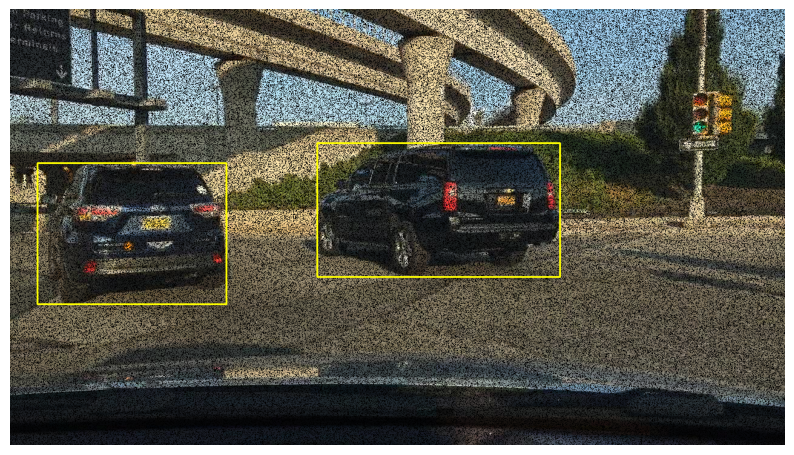

../../../../dataset/bdd/bdd100k_images_100k/bdd100k/images/100k/train\0000f77c-62c2a288.jpg


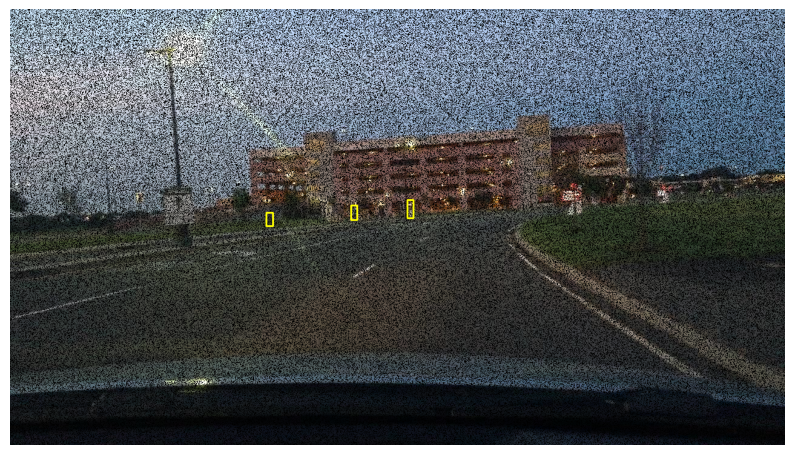

../../../../dataset/bdd/bdd100k_images_100k/bdd100k/images/100k/train\0000f77c-cb820c98.jpg


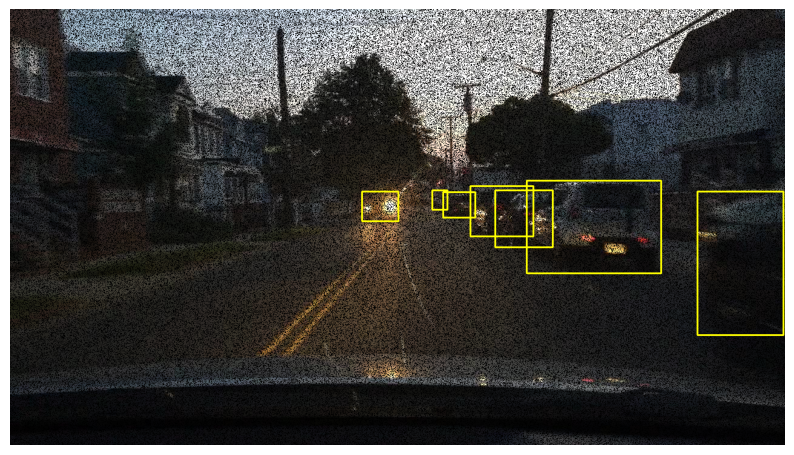

In [3]:
pixel_dropout_obj = pixel_dropout(num_min = 100000, num_max = 500000)

for i in range(3):
    img_path = selected_labels[i]['img_path']
    print(img_path)
    objCategoryid = selected_labels[i]['objCategoryid']
    boundingBox2D = selected_labels[i]['boundingBox2D']

    image_rgb = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
    image_rgb = pixel_dropout_obj.perform_dropout(image_rgb)
    draw_bbox_on_img_data(image_rgb, boundingBox2D, figsize=(10,8))

## Block Dropout Augmentation

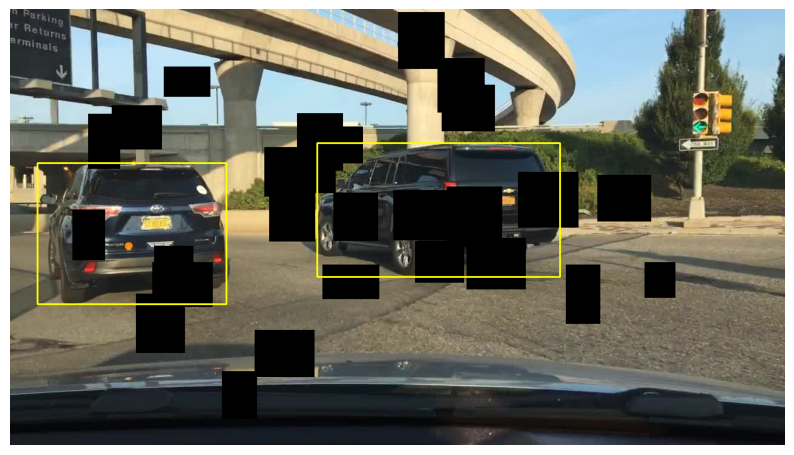

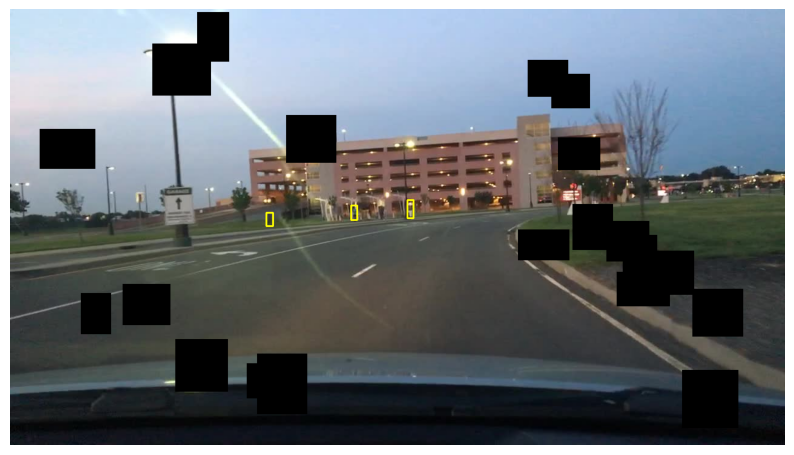

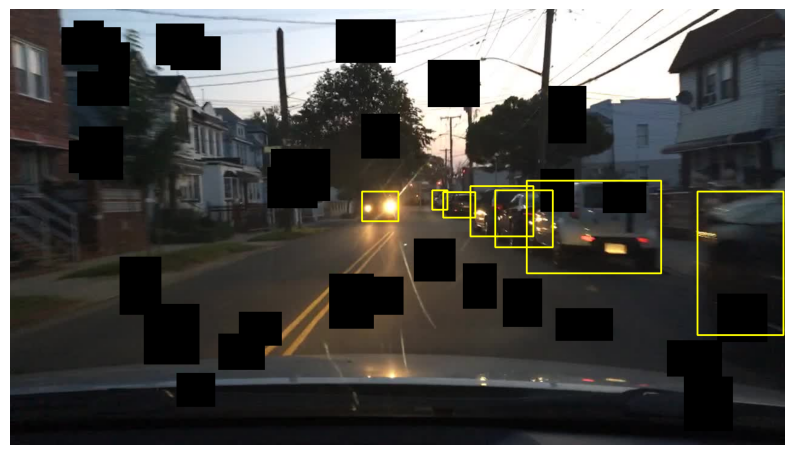

In [4]:
num_min = 20
num_max = 30
h_min = 50
h_max = 100
w_min = 50
w_max = 100

block_dropout_obj = block_dropout(
    num_min=num_min, num_max=num_max, 
    h_min=h_min, h_max=h_max,
    w_min=w_min, w_max=w_max)

for i in range(3):
    img_path = selected_labels[i]['img_path']
    objCategoryid = selected_labels[i]['objCategoryid']
    boundingBox2D = selected_labels[i]['boundingBox2D']

    image_rgb = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
    image_rgb = block_dropout_obj.perform_dropout(image_rgb)
    draw_bbox_on_img_data(image_rgb, boundingBox2D, figsize=(10,8))

## Grid Dropout Augmentation

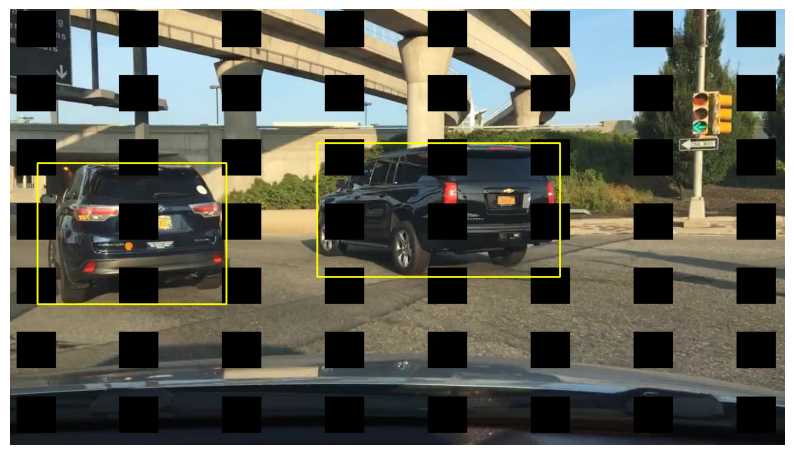

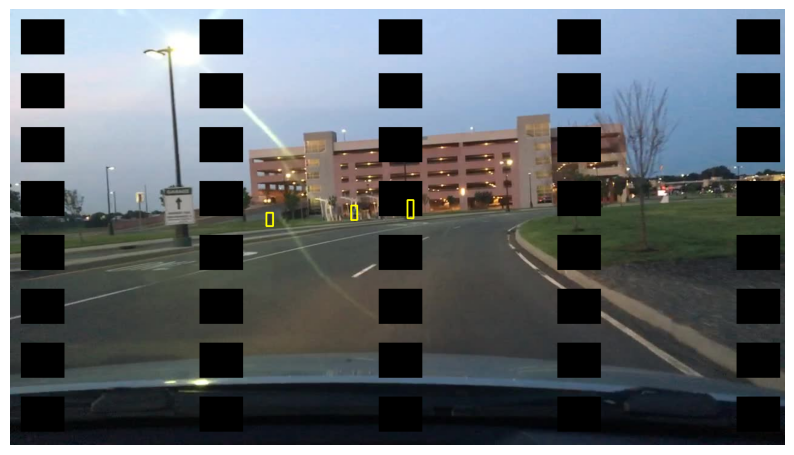

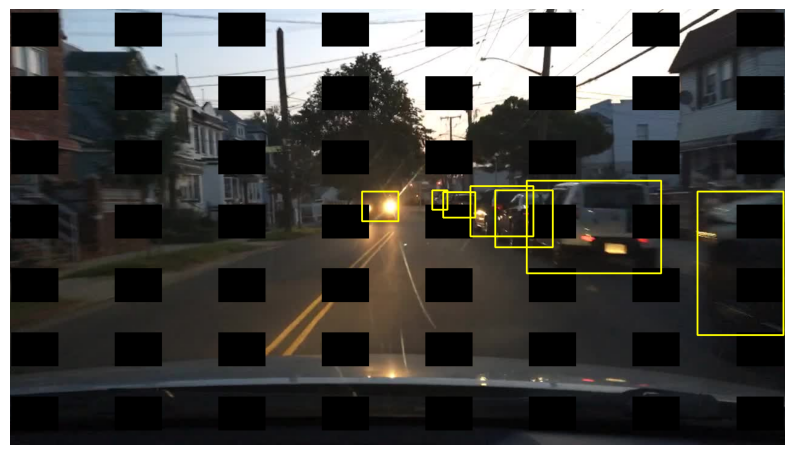

In [5]:
max_start_offset = 20
num_row_min = 5
num_row_max = 8
num_col_min = 5
num_col_max = 8
h_min = 50
h_max = 80
w_min = 50
w_max = 80

grid_dropout_obj = grid_dropout(
    max_start_offset=max_start_offset,
    num_row_min=num_row_min, num_row_max=num_row_max,
    num_col_min=num_col_min, num_col_max=num_col_max,
    h_min=h_min, h_max=h_max,
    w_min=w_min, w_max=w_max)

for i in range(3):
    img_path = selected_labels[i]['img_path']
    objCategoryid = selected_labels[i]['objCategoryid']
    boundingBox2D = selected_labels[i]['boundingBox2D']

    image_rgb = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
    image_rgb = grid_dropout_obj.perform_dropout(image_rgb)
    draw_bbox_on_img_data(image_rgb, boundingBox2D, figsize=(10,8))